# What book and author had the highest rating/reviews out of all the books listed on the amazon data list?
I will be conducting an observational study based on the data i already have because i will not changing or experimenting any variables.I'm going to be using the whole population of the Amazon list data. Most of the data was collected by scraping Amazon’s best seller lists. Any data that couldn’t be found in these lists was gathered using the GoodReads API. The lists were scraped in October 2020 to ensure that a decade of book data could be collected. One bias that could occur could be not every book being included in the data and that would not be accurate with my question. 

In [23]:
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import pearsonr

In [3]:
df = pd.read_csv("books.csv")
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [11]:
# This is the frequency table analyzing my data by reviews.
freq_table = df[['Name', 'Author', 'Reviews']].sort_values(by='Reviews', ascending=False)

# Show top 10 books
freq_table.head(10)

,Name,Author,Reviews
534,Where the Crawdads Sing,Delia Owens,87841
383,The Girl on the Train,Paula Hawkins,79446
382,The Girl on the Train,Paula Hawkins,79446
32,Becoming,Michelle Obama,61133
33,Becoming,Michelle Obama,61133
135,Gone Girl,Gillian Flynn,57271
136,Gone Girl,Gillian Flynn,57271
137,Gone Girl,Gillian Flynn,57271
367,The Fault in Our Stars,John Green,50482
366,The Fault in Our Stars,John Green,50482


In [12]:
# This is the frequency table by reviews.
highest_rating = df.sort_values(by='User Rating', ascending=False).head(1)
print("\n⭐ Book with Highest Rating:")
print(highest_rating[['Name', 'Author', 'User Rating']])
freq_table.head(10)


⭐ Book with Highest Rating:
                                 Name                 Author  User Rating
486  The Wonderful Things You Will Be  Emily Winfield Martin          4.9


,Name,Author,Reviews
534,Where the Crawdads Sing,Delia Owens,87841
383,The Girl on the Train,Paula Hawkins,79446
382,The Girl on the Train,Paula Hawkins,79446
32,Becoming,Michelle Obama,61133
33,Becoming,Michelle Obama,61133
135,Gone Girl,Gillian Flynn,57271
136,Gone Girl,Gillian Flynn,57271
137,Gone Girl,Gillian Flynn,57271
367,The Fault in Our Stars,John Green,50482
366,The Fault in Our Stars,John Green,50482


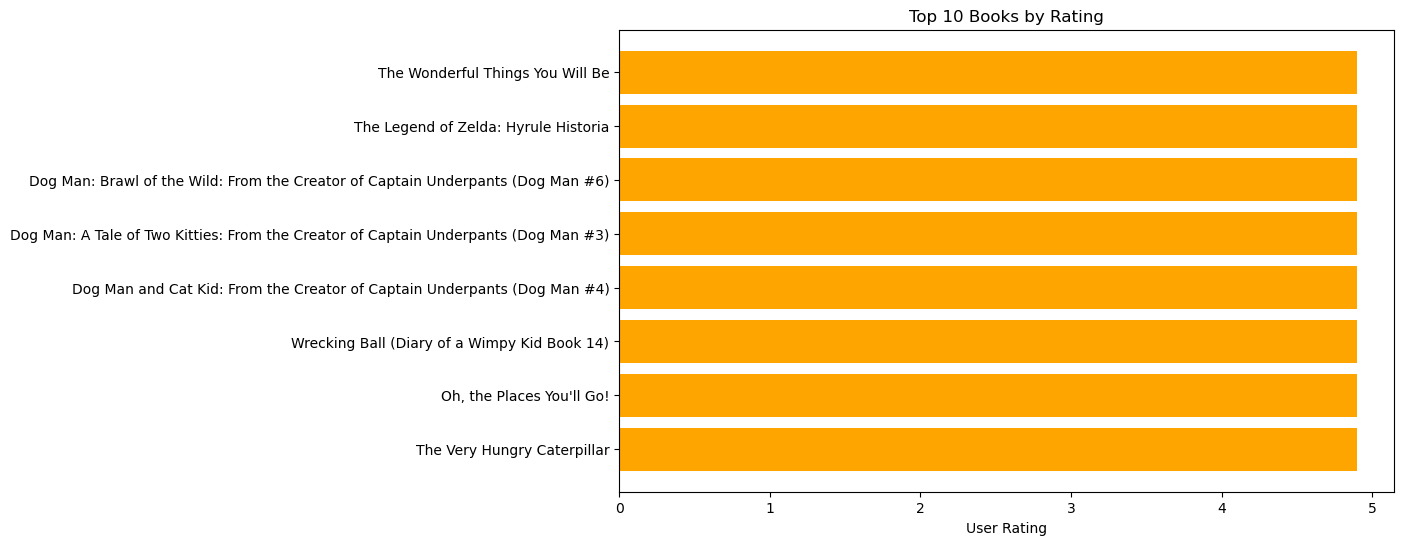

In [7]:
# This is the bar chart for highest rating
top10_ratings = df.sort_values(by='User Rating', ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top10_ratings['Name'], top10_ratings['User Rating'], color='orange')
plt.xlabel("User Rating")
plt.title("Top 10 Books by Rating")
plt.gca().invert_yaxis()
plt.show()

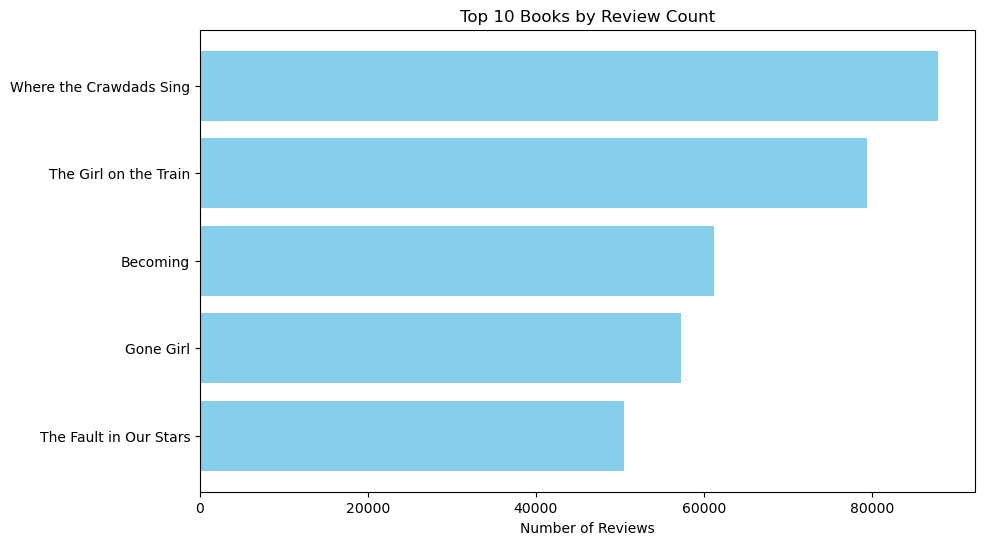

In [8]:
# This is the bar chart for highest reviews.
top10_reviews = freq_table.head(10)
plt.figure(figsize=(10,6))
plt.barh(top10_reviews['Name'], top10_reviews['Reviews'], color='skyblue')
plt.xlabel("Number of Reviews")
plt.title("Top 10 Books by Review Count")
plt.gca().invert_yaxis()  # largest on top
plt.show()

# Use pie chart to show which books dominate in reviews.
# Use histogram to show the overall spread of reviews.
# Use mean, median, mode to summarize central tendencies.
# Use percentiles to describe how extreme the top books are compared to others.

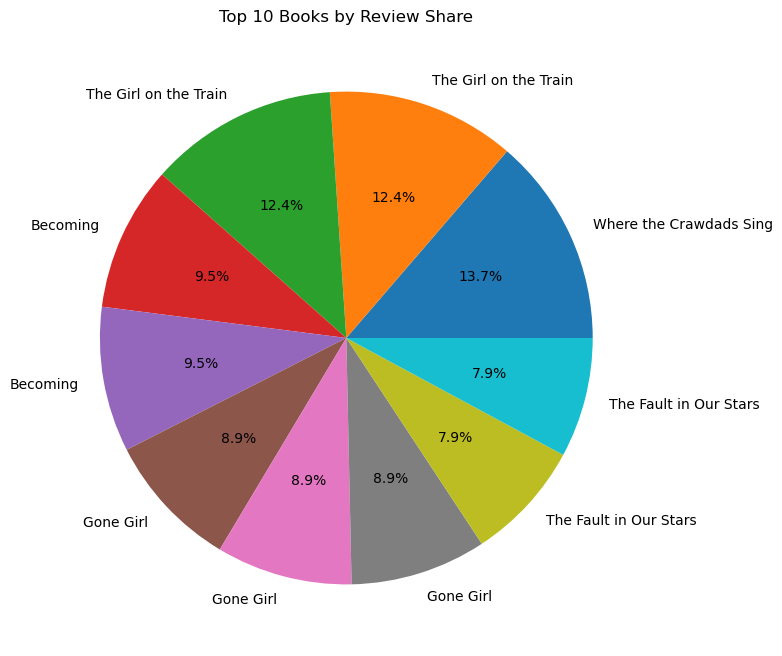

In [13]:
# This is the pie chart.
top10_reviews = freq_table.head(10)

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(top10_reviews['Reviews'], labels=top10_reviews['Name'], autopct='%1.1f%%')
plt.title("Top 10 Books by Review Share")
plt.show()

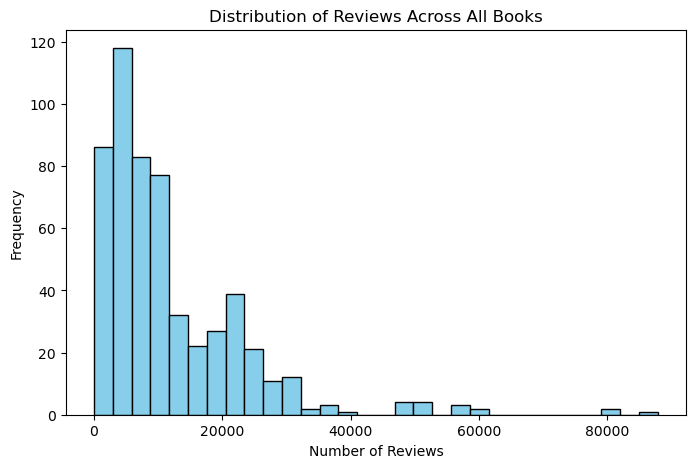

In [14]:
# Histogram of review counts
plt.figure(figsize=(8,5))
plt.hist(df['Reviews'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
plt.title("Distribution of Reviews Across All Books")
plt.show()

In [15]:
mean_reviews = df['Reviews'].mean()
median_reviews = df['Reviews'].median()
mode_reviews = df['Reviews'].mode()[0]

print("📊 Reviews - Mean:", mean_reviews)
print("📊 Reviews - Median:", median_reviews)
print("📊 Reviews - Mode:", mode_reviews)

📊 Reviews - Mean: 11953.281818181818
📊 Reviews - Median: 8580.0
📊 Reviews - Mode: 8580


In [16]:
# Example: 90th percentile of reviews
percentile_90 = df['Reviews'].quantile(0.90)

print("📊 90th Percentile of Reviews:", percentile_90)

📊 90th Percentile of Reviews: 25554.0


# Pie chart of top-rated books
# Histogram showing distribution of ratings
# Mean, median, mode of ratings
# Percentiles to see how exceptional the highest-rated books are

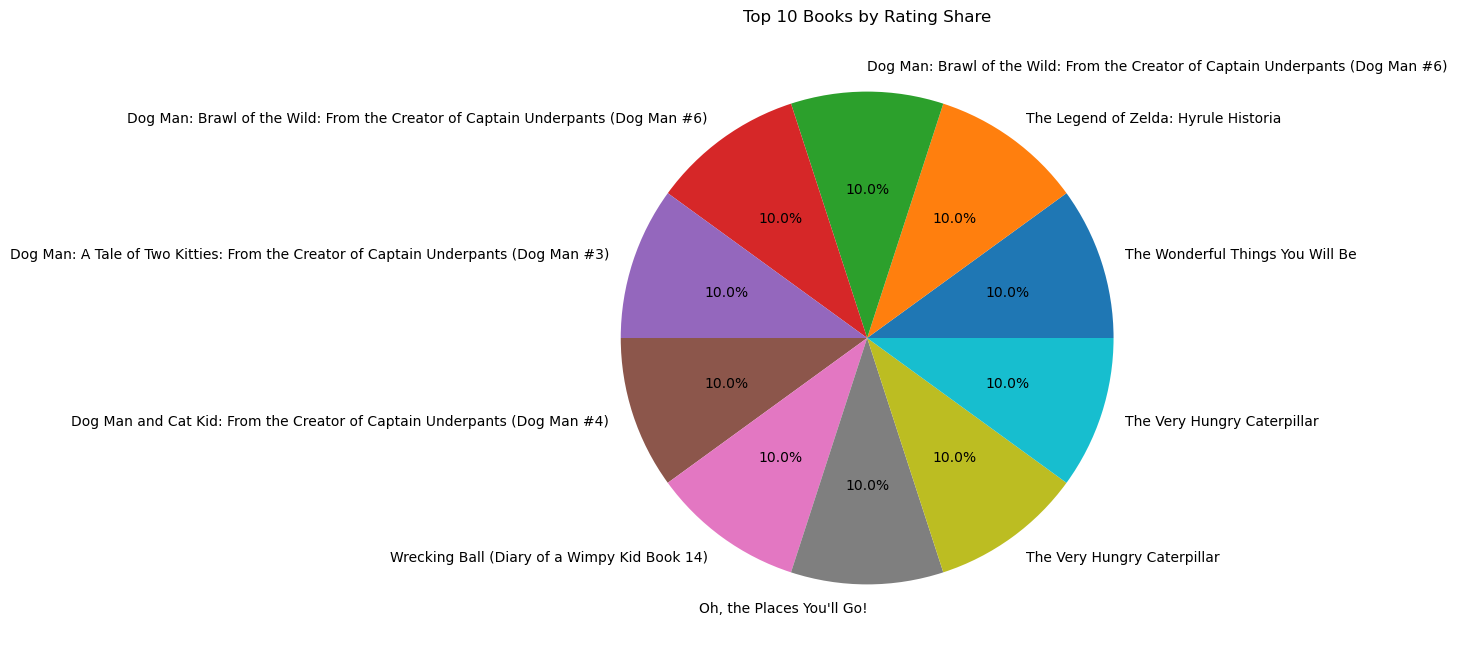

In [17]:
# Take the top 10 rated books
top10_ratings = df.sort_values(by='User Rating', ascending=False).head(10)

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(top10_ratings['User Rating'], labels=top10_ratings['Name'], autopct='%1.1f%%')
plt.title("Top 10 Books by Rating Share")
plt.show()

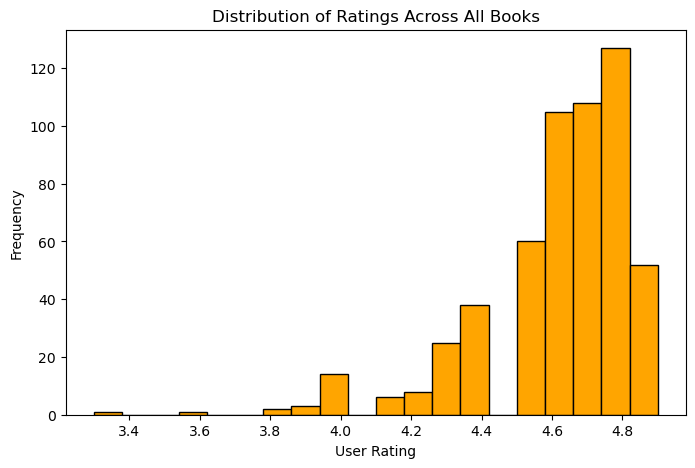

In [18]:
# Histogram of ratings
plt.figure(figsize=(8,5))
plt.hist(df['User Rating'], bins=20, color='orange', edgecolor='black')
plt.xlabel("User Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Ratings Across All Books")
plt.show()

In [19]:
mean_rating = df['User Rating'].mean()
median_rating = df['User Rating'].median()
mode_rating = df['User Rating'].mode()[0]

print("⭐ Ratings - Mean:", mean_rating)
print("⭐ Ratings - Median:", median_rating)
print("⭐ Ratings - Mode:", mode_rating)

⭐ Ratings - Mean: 4.618363636363637
⭐ Ratings - Median: 4.7
⭐ Ratings - Mode: 4.8


In [20]:
# Example: 90th percentile of ratings
percentile_90_rating = df['User Rating'].quantile(0.90)

print("⭐ 90th Percentile of Ratings:", percentile_90_rating)

⭐ 90th Percentile of Ratings: 4.8


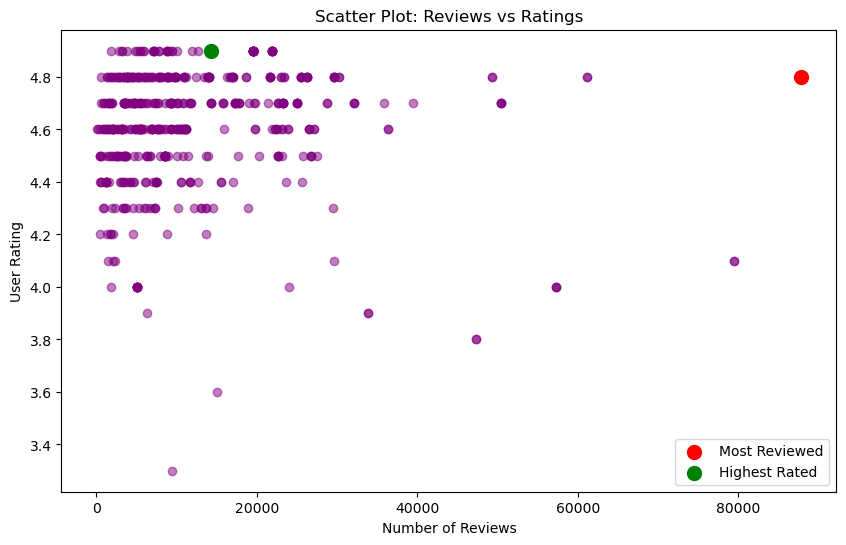

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(df['Reviews'], df['User Rating'], alpha=0.5, color='purple')

plt.xlabel("Number of Reviews")
plt.ylabel("User Rating")
plt.title("Scatter Plot: Reviews vs Ratings")

# Highlight top reviewed book
top_reviewed = df.loc[df['Reviews'].idxmax()]
plt.scatter(top_reviewed['Reviews'], top_reviewed['User Rating'], color='red', s=100, label="Most Reviewed")

# Highlight top rated book
top_rated = df.loc[df['User Rating'].idxmax()]
plt.scatter(top_rated['Reviews'], top_rated['User Rating'], color='green', s=100, label="Highest Rated")

plt.legend()
plt.show()

In [22]:
print("📕 Most Reviewed Book:")
print(top_reviewed[['Name', 'Author', 'Reviews', 'User Rating']])

print("\n⭐ Highest Rated Book:")
print(top_rated[['Name', 'Author', 'Reviews', 'User Rating']])


📕 Most Reviewed Book:
Name           Where the Crawdads Sing
Author                     Delia Owens
Reviews                          87841
User Rating                        4.8
Name: 534, dtype: object

⭐ Highest Rated Book:
Name           Brown Bear, Brown Bear, What Do You See?
Author                                  Bill Martin Jr.
Reviews                                           14344
User Rating                                         4.9
Name: 40, dtype: object


# After analyzing my data and observing it. I came up with the conclusion that the Most reviewed book is 'Where the Crawdads Sing' with the author being Delia Owens. While the highest rated book is ' Brown Bear, Brown Bear, What do you see?' with the author Bill Martin Jr. 